# 0. Install Dependencies and Bring in Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [7]:
df = pd.read_csv(os.path.join('/content/drive/MyDrive/Colab Notebooks/Deep Learning/youtube_learning/Nicholas_Renotte/03_Comment Toxicity identification/CommentToxicity/jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))
# Here os.path.join used to join the train and test files

In [8]:
df.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
129082,b258815774afddcf,How dare you do that?! How would you like it i...,1,0,0,0,0,0
8265,15f692989a1e643e,"""\nI could go with that. I think if we could f...",0,0,0,0,0,0
72650,c263e297d86493cf,"Thanks, I added my $0.02.",0,0,0,0,0,0
151131,77d84b1321c22d9a,"LGBT \n\nyou little fuck , are you a fag , tha...",1,1,1,1,1,1
9978,1a6d8e02d7fe85a3,"""\n\nChat\nHi XLR8TION, thanks for adding the ...",0,0,0,0,0,0


In [9]:
df.shape

(159571, 8)

In [10]:
df[df['toxic']==1].head() # checking the 1st 5 toxic comments

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [11]:
df[df.columns[2:]].iloc[2]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 2, dtype: int64

# 1. Preprocess

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [12]:
from tensorflow.keras.layers import TextVectorization

In [13]:
TextVectorization??

In [14]:
# split the data into comments and labels
X = df['comment_text']
y = df[df.columns[2:]].values # adding .values will convert the df into numpy arrays

In [15]:
MAX_FEATURES = 200000 # number of words in the vocab

In [16]:
# defining the TextVectorizor
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800, # words in the sentence
                               output_mode='int') # converting the words into integers

In [17]:
# Applying the vectorizer to the X
vectorizer.adapt(X.values)

In [18]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [19]:
# Check the vectorizer with new set of words
vectorizer('Hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 263, 306,   9, 275])>

In [20]:
vectorized_text = vectorizer(X.values) # converting the values as numpy array

In [21]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [22]:
# Tensorflow datapipeline
#MCSBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps prevent bottlenecks

In [23]:
dataset.as_numpy_iterator().next() # Our text is represented as batch with vectorized format + Lables

(array([[25115,  1905, 10001, ...,     0,     0,     0],
        [ 1288,  3724,  1378, ...,     0,     0,     0],
        [   76,    20,     7, ...,     0,     0,     0],
        ...,
        [40131, 11817, 40131, ...,     0,     0,     0],
        [86971,   405,    13, ...,     0,     0,     0],
        [  139,     7,   118, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0]]))

In [24]:
train = dataset.take(int(len(dataset)*.7)) # 70% for training
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2)) # 20% for validation
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1)) # 10 % for testing

In [26]:
len(dataset), len(train), len(val), len(test)

(9974, 6981, 1994, 997)

# 2. Create Sequential Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [30]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32)) # we have 2,00,000 which is input, at out put we get 32 vector

# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# bidirectional allows the information to pass through both ways, it is mostly suitable for NLP type of tasks

# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Final layer
model.add(Dense(6, activation='sigmoid'))

In [31]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')
# Since we are running 6 different binary values we have to use the BinaryCrossentropy

In [32]:
model.summary()
# since we are using the Bidirection layer, the input layer there is 32 but it added another 32 and showing as 64

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [33]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 908s 128ms/step - loss: 0.0633 - val_loss: 0.0451


In [34]:
from matplotlib import pyplot as plt

In [37]:
history.history

{'loss': [0.06331425160169601], 'val_loss': [0.045087024569511414]}

<Figure size 800x500 with 0 Axes>

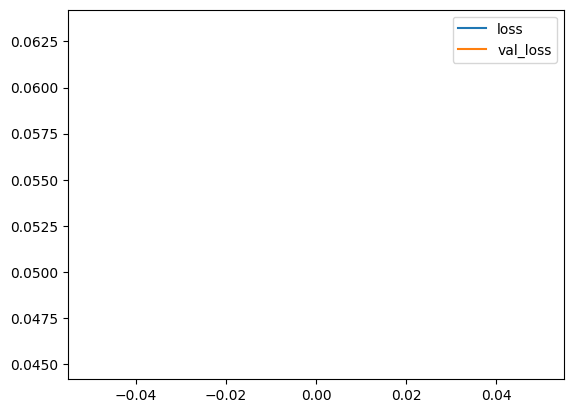

In [36]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()
# Since we Ran only one epoch we dont have the graph here

# 3. Make Predictions

In [38]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [41]:
res = model.predict(np.expand_dims(input_text, 0))

1/1 [==============================] - 1s 792ms/step


In [39]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [42]:
res

array([[0.994888  , 0.5306091 , 0.9644638 , 0.09209598, 0.8290018 ,
        0.28737265]], dtype=float32)

In [43]:
(res > 0.5).astype(int)

array([[1, 1, 1, 0, 1, 0]])

In [44]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [45]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 71ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [46]:
res.shape

(1, 6)

# 4. Evaluate Model

In [47]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [48]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [49]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 71ms/step


In [50]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.7706778049468994, Recall:0.7301272749900818, Accuracy:0.46238717436790466


# 5. Test and Gradio

In [71]:
import tensorflow as tf
import gradio as gr # Gradio is not Working

ImportError: ignored

In [72]:
model.save('toxicity.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [73]:
model = tf.keras.models.load_model('toxicity.h5')

In [74]:
input_str = vectorizer('hey i freaken hate you!')

In [75]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 3s 3s/step


In [76]:
res

array([[0.8394643 , 0.02723379, 0.45214084, 0.03079931, 0.41050914,
        0.09480336]], dtype=float32)

In [77]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)

    return text

In [78]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

NameError: ignored

In [79]:
interface.launch(share=True)

NameError: ignored